# Postprocess locations from DLC and a video

In [1]:
import h5py
import os
import matplotlib.pyplot as plt

from DLC_for_WBFM.utils.postprocessing.postprocessing_utils import *
import cv2
import torch
import tifffile

from ipywidgets import interact, interactive, fixed, interact_manual
from dNMF.Demix.dNMF import dNMF
import time
import scipy.io as scio
from sklearn.decomposition import FastICA

c:\users\charles.fieseler\documents\current_work\dlc_for_wbfm\DLC_for_WBFM\utils\postprocessing\postprocessing_utils.py:704: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(crop_sz)==3, "Crop must be 3d")


## BEFORE ANYTHING: move the gcamp video to the project folder!

## First, read the locations from DLC

In [2]:
which_neuron = 2; # Not sure which neurons are which

In [3]:
# Get the video folder, then the annotation
project_folder = r'C:\Users\charles.fieseler\Documents\Current_work\DLC_for_WBFM\DLC_Projects\wbfm_3d-Charlie-2020-11-02'
bigtiff_folder = r'D:\More-stabilized-wbfm'

annotation_fname = r'videos\test2020-10-22_mcherry_fr1000_sl10_15DLC_resnet50_wbfm_3dNov2shuffle1_200000.h5'
annotation_fname = os.path.join(project_folder, annotation_fname)

# Will get traces from two videos:
btf_fname_mcherry = r'test2020-10-22_16-15-20_test4-channel-0-pco_camera1\test2020-10-22_16-15-20_test4-channel-0-pco_camera1bigtiff.btf'
btf_fname_mcherry = os.path.join(bigtiff_folder, btf_fname_mcherry)
btf_fname_gcamp = r'test2020-10-22_16-15-20_test4-channel-1-pco_camera2\test2020-10-22_16-15-20_test4-channel-1-pco_camera2bigtiff.btf'
btf_fname_gcamp = os.path.join(bigtiff_folder, btf_fname_gcamp)

In [4]:
# Get the positions from the annotation: ONE neuron
this_xy, this_prob = xy_from_dlc_dat(annotation_fname, which_neuron=which_neuron, num_frames=1000)

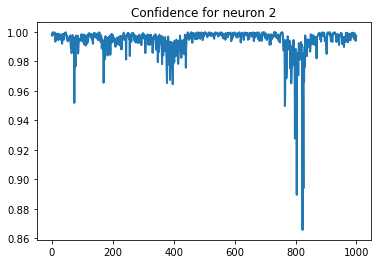

In [5]:
plt.plot(this_prob, lw=2)
# plt.ylim([0,1])
plt.title(f'Confidence for neuron {which_neuron}');

## Second, get a moving 3d crop centering this neuron

In [14]:
# Use video from above

num_frames = 3
sz= (21,21, 7)
which_z = 12
alpha = 0.15
start_volume = 100

In [15]:
cropped_dat_mcherry = get_crop_from_ometiff_virtual(btf_fname_mcherry, 
                                                    this_xy, which_z, 
                                                    num_frames, 
                                                    crop_sz=sz,
                                                    num_slices=33,
                                                    actually_create=True,
                                                    alpha=alpha,
                                                    start_volume=start_volume,
                                                    actually_crop=False)
cropped_dat_gcamp = get_crop_from_ometiff_virtual(btf_fname_gcamp, 
                                                  this_xy, which_z, 
                                                  num_frames,
                                                  crop_sz=sz,
                                                  num_slices=33,
                                                  actually_create=True,
                                                  flip_x=True,
                                                  alpha=alpha,
                                                  start_volume=start_volume,
                                                  actually_crop=False)

Cropping 33 slices, starting at 0
Full size read as (3, 33, 700, 900)
Page 3300/99; volume 0/3 to cropped array slice 0
Page 3301/99; volume 0/3 to cropped array slice 1
Page 3302/99; volume 0/3 to cropped array slice 2
Page 3303/99; volume 0/3 to cropped array slice 3
Page 3304/99; volume 0/3 to cropped array slice 4
Page 3305/99; volume 0/3 to cropped array slice 5
Page 3306/99; volume 0/3 to cropped array slice 6
Page 3307/99; volume 0/3 to cropped array slice 7
Page 3308/99; volume 0/3 to cropped array slice 8
Page 3309/99; volume 0/3 to cropped array slice 9
Page 3310/99; volume 0/3 to cropped array slice 10
Page 3311/99; volume 0/3 to cropped array slice 11
Page 3312/99; volume 0/3 to cropped array slice 12
Page 3313/99; volume 0/3 to cropped array slice 13
Page 3314/99; volume 0/3 to cropped array slice 14
Page 3315/99; volume 0/3 to cropped array slice 15
Page 3316/99; volume 0/3 to cropped array slice 16
Page 3317/99; volume 0/3 to cropped array slice 17
Page 3318/99; volume 0

Page 3376/99; volume 2/3 to cropped array slice 10
Page 3377/99; volume 2/3 to cropped array slice 11
Page 3378/99; volume 2/3 to cropped array slice 12
Page 3379/99; volume 2/3 to cropped array slice 13
Page 3380/99; volume 2/3 to cropped array slice 14
Page 3381/99; volume 2/3 to cropped array slice 15
Page 3382/99; volume 2/3 to cropped array slice 16
Page 3383/99; volume 2/3 to cropped array slice 17
Page 3384/99; volume 2/3 to cropped array slice 18
Page 3385/99; volume 2/3 to cropped array slice 19
Page 3386/99; volume 2/3 to cropped array slice 20
Page 3387/99; volume 2/3 to cropped array slice 21
Page 3388/99; volume 2/3 to cropped array slice 22
Page 3389/99; volume 2/3 to cropped array slice 23
Page 3390/99; volume 2/3 to cropped array slice 24
Page 3391/99; volume 2/3 to cropped array slice 25
Page 3392/99; volume 2/3 to cropped array slice 26
Page 3393/99; volume 2/3 to cropped array slice 27
Page 3394/99; volume 2/3 to cropped array slice 28
Page 3395/99; volume 2/3 to cro

In [ ]:
error

In [22]:
def f(t,z): 
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.imshow(cropped_dat_mcherry[t,z,...]);
    plt.title('mcherry')
    plt.colorbar()
    plt.clim(0, 200)
    
    plt.subplot(122)
    plt.imshow(cropped_dat_gcamp[t,z,...]);
    plt.title('gcamp')
    plt.colorbar()
    plt.clim(0, 20)
interact(f, t=(0,num_frames-1), z=(0,sz[-1]-1));

interactive(children=(IntSlider(value=1, description='t', max=2), IntSlider(value=3, description='z', max=6), …

In [ ]:
cropped_dat_mcherry.shape

## Aside: Simple ways to get traces

Find the direct maximum and the mean of top 10%

In [ ]:
max_coords, max_values = local_maxima_2D(cropped_dat_mcherry[:,:,0,:])

In [ ]:
def f(i):
    plt.figure(figsize=[15,5])
    
    plt.subplot(121)
    plt.imshow(cropped_dat_mcherry[:,:,0,i], vmin=50, vmax=np.amax(max_values));
    plt.title(f'mcherry Max = {max_values[i]}')
    
    plt.subplot(122)
    plt.plot(max_values)
    plt.scatter(i, max_values[i], c='r', linewidths=5)
interact(f, i=(0,num_frames-1));

In [ ]:
mean_percentile_values_gcamp = mean_of_top_percentile(cropped_dat_gcamp[:,:,0,:], percentile=95)
mean_percentile_values_mcherry = mean_of_top_percentile(cropped_dat_mcherry[:,:,0,:], percentile=95)

In [ ]:
def f(i):
    plt.figure(figsize=[15,5])
    
    plt.subplot(121)
#     plt.imshow(cropped_dat_gcamp[:,:,0,i], vmin=50, vmax=np.amax(max_values));
    plt.imshow(cropped_dat_gcamp[:,:,0,i], vmin=0);
    plt.colorbar()
    plt.title(f'gcamp Mean of top 10% = {mean_percentile_values_gcamp[i]}')
    
    plt.subplot(122)
    plt.plot(mean_percentile_values_gcamp / np.max(mean_percentile_values_gcamp), label='gcamp')
    plt.plot(mean_percentile_values_mcherry / np.max(mean_percentile_values_mcherry), label='mcherry')
    plt.scatter(i, (mean_percentile_values_gcamp / np.max(mean_percentile_values_gcamp))[i], c='r', linewidths=5)
    plt.title('Mean of top 10%')
    plt.legend()
interact(f, i=(0,num_frames-1));

In [ ]:
plt.plot(mean_percentile_values_gcamp / mean_percentile_values_mcherry)

## Run dNMF

In [ ]:
# %% Choosing the parameters
params = {'n_trials':5, 'noise_level':1e-2, 'sigma_inv':.2, 
          'radius':10, 'step_S':.1, 'gamma':0, 'stride_factor':2, 'density':.1, 'varfact':5,
          'traj_means':[.0,.0,.0], 'traj_variances':[2e-4,2e-4,1e-5], 'sz':[20,20,1], 
          'K':20, 'T':100, 'roi_window':[4,4,0]}

In [ ]:
# Build position and convert to pytorch
# sz=(28,28,10)
positions =[list(sz),[0, 0, 0]] # Add a dummy position
positions = np.expand_dims(positions,2)/2.0 # Return the center of the crop
positions =  torch.tensor(positions).float()
print(positions)
print(positions.shape)

# Also convert video to pytorch
dat_mcherry = torch.tensor(np.transpose(cropped_dat_mcherry, axes=(2,3,1,0))).float()
dat_gcamp = torch.tensor(np.transpose(cropped_dat_gcamp, axes=(2,3,1,0))).float()

params2={'positions':positions,\
    'radius':params['radius'],'step_S':params['step_S'],'gamma':params['gamma'],\
    'use_gpu':False,'initial_p':positions[:,:,0],'sigma_inv':params['sigma_inv'],\
    'method':'1->t', 'verbose':False}
# params = {'positions':positions[:,:,0][:,:,np.newaxis],\
#     'radius':params['radius'],'step_S':params['step_S'],'gamma':params['gamma'],\
#     'use_gpu':False,'initial_p':positions[:,:,0],'sigma_inv':params['sigma_inv'],\
#     'method':'1->t', 'verbose':False}
print(dat_mcherry.shape)

In [ ]:
start = time.time()
# Initialize using the following from the ground truth:
#  Initial positions
#  Radius
#  
dnmf_mcherry = dNMF(dat_mcherry,params=params2)
dnmf_gcamp = dNMF(dat_gcamp,params=params2)

dnmf_mcherry.optimize(lr=1e-4,n_iter=20,n_iter_c=2)
print("Finished mcherry, now doing gcamp...")
dnmf_gcamp.optimize(lr=1e-4,n_iter=20,n_iter_c=2)
end = time.time()
print('dNMF finished in ' + str(end-start) + ' seconds')

## Plot the dNMF traces

In [ ]:

plt.subplot(121)
plt.plot(dnmf_mcherry.C[0,:]) # This index is which neuron within the crop
plt.title(f'raw mcherry for neuron {which_neuron}')

plt.subplot(122)
plt.plot(dnmf_gcamp.C[0,:]) # This index is which neuron within the crop
plt.title('raw gcamp')

plt.figure(figsize=(15,5))

## Workflows to denoise gcamp using mcherry

### First, ICA

In [ ]:
# Data shaping
X = np.vstack((dnmf_mcherry.C[0,:], dnmf_gcamp.C[0,:])).transpose()
transformer = FastICA(n_components=2, random_state=0)
X_transformed = transformer.fit_transform(X)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(dnmf_gcamp.C[0,:]) # This index is which neuron within the crop
plt.title('raw gcamp')

plt.subplot(132)
plt.plot(-X_transformed[:,0]) # This index is which neuron within the crop
plt.title('ICA-corrected gcamp')

# plt.subplot(133)
# plt.plot(wb_dat)
# plt.title('trace from wb')

### Second, ratiometric

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(dnmf_gcamp.C[0,:]) # This index is which neuron within the crop
plt.title('raw gcamp')

plt.subplot(132)
plt.plot(dnmf_gcamp.C[0,:] / dnmf_mcherry.C[0,:]) # This index is which neuron within the crop
plt.title('ratio of gcamp to mcherry')

# plt.subplot(133)
# plt.plot(wb_dat)
# plt.title('trace from wb')

## Not working: visualize neuron footprints

In [ ]:
neuron_names = [str(i) for i in range(positions.shape[0])]
# dnmf.visualize_traces('result', [dnmf.C], save=False)
# dnmf.visualize_traces('result',np.expand_dims(dnmf.C, axis=-1), neuron_names, save=False)
# dnmf_mcherry.visualize_neurons(f'Results2d_neuron{which_neuron}', [['0','1']], neuron_names, dat, window=np.array([10,10]))

In [ ]:
X_transformed.shape

In [ ]:
X_transformed


## Get all traces

In [6]:

num_frames = 500
sz=(21,21, 5)
which_z = 12
alpha = 0.15
start_volume = 100
num_slices = 33


z_params = (which_z, num_slices, alpha, start_volume)

In [ ]:
all_traces = extract_all_traces(annotation_fname,
                               btf_fname_mcherry,
                               btf_fname_gcamp,
                               which_neurons=None,
                               num_frames=num_frames,
                               crop_sz=sz,
                               params=None,
                               is_3d=True,
                               z_params=z_params)

Found annotations for 8 neurons and 500 frames
Starting analysis of neuron 0/8...
Cropping 5 slices, starting at 9
Full size read as (700, 900)
Page 3309/16500; volume 0/500 to cropped array slice 0
Page 3310/16500; volume 0/500 to cropped array slice 1
Page 3311/16500; volume 0/500 to cropped array slice 2
Page 3312/16500; volume 0/500 to cropped array slice 3
Page 3313/16500; volume 0/500 to cropped array slice 4
Page 3342/16500; volume 1/500 to cropped array slice 0
Page 3343/16500; volume 1/500 to cropped array slice 1
Page 3344/16500; volume 1/500 to cropped array slice 2
Page 3345/16500; volume 1/500 to cropped array slice 3
Page 3346/16500; volume 1/500 to cropped array slice 4
Page 3375/16500; volume 2/500 to cropped array slice 0
Page 3376/16500; volume 2/500 to cropped array slice 1
Page 3377/16500; volume 2/500 to cropped array slice 2
Page 3378/16500; volume 2/500 to cropped array slice 3
Page 3379/16500; volume 2/500 to cropped array slice 4
Page 3408/16500; volume 3/500 t

Page 4467/16500; volume 35/500 to cropped array slice 3
Page 4468/16500; volume 35/500 to cropped array slice 4
Page 4497/16500; volume 36/500 to cropped array slice 0
Page 4498/16500; volume 36/500 to cropped array slice 1
Page 4499/16500; volume 36/500 to cropped array slice 2
Page 4500/16500; volume 36/500 to cropped array slice 3
Page 4501/16500; volume 36/500 to cropped array slice 4
Page 4530/16500; volume 37/500 to cropped array slice 0
Page 4531/16500; volume 37/500 to cropped array slice 1
Page 4532/16500; volume 37/500 to cropped array slice 2
Page 4533/16500; volume 37/500 to cropped array slice 3
Page 4534/16500; volume 37/500 to cropped array slice 4
Page 4563/16500; volume 38/500 to cropped array slice 0
Page 4564/16500; volume 38/500 to cropped array slice 1
Page 4565/16500; volume 38/500 to cropped array slice 2
Page 4566/16500; volume 38/500 to cropped array slice 3
Page 4567/16500; volume 38/500 to cropped array slice 4
Page 4596/16500; volume 39/500 to cropped array 

Page 5623/16500; volume 70/500 to cropped array slice 4
Page 5652/16500; volume 71/500 to cropped array slice 0
Page 5653/16500; volume 71/500 to cropped array slice 1
Page 5654/16500; volume 71/500 to cropped array slice 2
Page 5655/16500; volume 71/500 to cropped array slice 3
Page 5656/16500; volume 71/500 to cropped array slice 4
Page 5685/16500; volume 72/500 to cropped array slice 0
Page 5686/16500; volume 72/500 to cropped array slice 1
Page 5687/16500; volume 72/500 to cropped array slice 2
Page 5688/16500; volume 72/500 to cropped array slice 3
Page 5689/16500; volume 72/500 to cropped array slice 4
Page 5718/16500; volume 73/500 to cropped array slice 0
Page 5719/16500; volume 73/500 to cropped array slice 1
Page 5720/16500; volume 73/500 to cropped array slice 2
Page 5721/16500; volume 73/500 to cropped array slice 3
Page 5722/16500; volume 73/500 to cropped array slice 4
Page 5751/16500; volume 74/500 to cropped array slice 0
Page 5752/16500; volume 74/500 to cropped array 

Page 6776/16500; volume 105/500 to cropped array slice 2
Page 6777/16500; volume 105/500 to cropped array slice 3
Page 6778/16500; volume 105/500 to cropped array slice 4
Page 6807/16500; volume 106/500 to cropped array slice 0
Page 6808/16500; volume 106/500 to cropped array slice 1
Page 6809/16500; volume 106/500 to cropped array slice 2
Page 6810/16500; volume 106/500 to cropped array slice 3
Page 6811/16500; volume 106/500 to cropped array slice 4
Page 6840/16500; volume 107/500 to cropped array slice 0
Page 6841/16500; volume 107/500 to cropped array slice 1
Page 6842/16500; volume 107/500 to cropped array slice 2
Page 6843/16500; volume 107/500 to cropped array slice 3
Page 6844/16500; volume 107/500 to cropped array slice 4
Page 6873/16500; volume 108/500 to cropped array slice 0
Page 6874/16500; volume 108/500 to cropped array slice 1
Page 6875/16500; volume 108/500 to cropped array slice 2
Page 6876/16500; volume 108/500 to cropped array slice 3
Page 6877/16500; volume 108/500

Page 7930/16500; volume 140/500 to cropped array slice 1
Page 7931/16500; volume 140/500 to cropped array slice 2
Page 7932/16500; volume 140/500 to cropped array slice 3
Page 7933/16500; volume 140/500 to cropped array slice 4
Page 7962/16500; volume 141/500 to cropped array slice 0
Page 7963/16500; volume 141/500 to cropped array slice 1
Page 7964/16500; volume 141/500 to cropped array slice 2
Page 7965/16500; volume 141/500 to cropped array slice 3
Page 7966/16500; volume 141/500 to cropped array slice 4
Page 7995/16500; volume 142/500 to cropped array slice 0
Page 7996/16500; volume 142/500 to cropped array slice 1
Page 7997/16500; volume 142/500 to cropped array slice 2
Page 7998/16500; volume 142/500 to cropped array slice 3
Page 7999/16500; volume 142/500 to cropped array slice 4
Page 8028/16500; volume 143/500 to cropped array slice 0
Page 8029/16500; volume 143/500 to cropped array slice 1
Page 8030/16500; volume 143/500 to cropped array slice 2
Page 8031/16500; volume 143/500

Page 8887/16500; volume 169/500 to cropped array slice 1
Page 8888/16500; volume 169/500 to cropped array slice 2
Page 8889/16500; volume 169/500 to cropped array slice 3
Page 8890/16500; volume 169/500 to cropped array slice 4
Page 8919/16500; volume 170/500 to cropped array slice 0
Page 8920/16500; volume 170/500 to cropped array slice 1
Page 8921/16500; volume 170/500 to cropped array slice 2
Page 8922/16500; volume 170/500 to cropped array slice 3
Page 8923/16500; volume 170/500 to cropped array slice 4
Page 8952/16500; volume 171/500 to cropped array slice 0
Page 8953/16500; volume 171/500 to cropped array slice 1
Page 8954/16500; volume 171/500 to cropped array slice 2
Page 8955/16500; volume 171/500 to cropped array slice 3
Page 8956/16500; volume 171/500 to cropped array slice 4
Page 8985/16500; volume 172/500 to cropped array slice 0
Page 8986/16500; volume 172/500 to cropped array slice 1
Page 8987/16500; volume 172/500 to cropped array slice 2
Page 8988/16500; volume 172/500

Page 10041/16500; volume 204/500 to cropped array slice 0
Page 10042/16500; volume 204/500 to cropped array slice 1
Page 10043/16500; volume 204/500 to cropped array slice 2
Page 10044/16500; volume 204/500 to cropped array slice 3
Page 10045/16500; volume 204/500 to cropped array slice 4
Page 10074/16500; volume 205/500 to cropped array slice 0
Page 10075/16500; volume 205/500 to cropped array slice 1
Page 10076/16500; volume 205/500 to cropped array slice 2
Page 10077/16500; volume 205/500 to cropped array slice 3
Page 10078/16500; volume 205/500 to cropped array slice 4
Page 10107/16500; volume 206/500 to cropped array slice 0
Page 10108/16500; volume 206/500 to cropped array slice 1
Page 10109/16500; volume 206/500 to cropped array slice 2
Page 10110/16500; volume 206/500 to cropped array slice 3
Page 10111/16500; volume 206/500 to cropped array slice 4
Page 10140/16500; volume 207/500 to cropped array slice 0
Page 10141/16500; volume 207/500 to cropped array slice 1
Page 10142/165

Page 11166/16500; volume 238/500 to cropped array slice 3
Page 11167/16500; volume 238/500 to cropped array slice 4
Page 11196/16500; volume 239/500 to cropped array slice 0
Page 11197/16500; volume 239/500 to cropped array slice 1
Page 11198/16500; volume 239/500 to cropped array slice 2
Page 11199/16500; volume 239/500 to cropped array slice 3
Page 11200/16500; volume 239/500 to cropped array slice 4
Page 11229/16500; volume 240/500 to cropped array slice 0
Page 11230/16500; volume 240/500 to cropped array slice 1
Page 11231/16500; volume 240/500 to cropped array slice 2
Page 11232/16500; volume 240/500 to cropped array slice 3
Page 11233/16500; volume 240/500 to cropped array slice 4
Page 11262/16500; volume 241/500 to cropped array slice 0
Page 11263/16500; volume 241/500 to cropped array slice 1
Page 11264/16500; volume 241/500 to cropped array slice 2
Page 11265/16500; volume 241/500 to cropped array slice 3
Page 11266/16500; volume 241/500 to cropped array slice 4
Page 11295/165

Page 12288/16500; volume 272/500 to cropped array slice 3
Page 12289/16500; volume 272/500 to cropped array slice 4
Page 12318/16500; volume 273/500 to cropped array slice 0
Page 12319/16500; volume 273/500 to cropped array slice 1
Page 12320/16500; volume 273/500 to cropped array slice 2
Page 12321/16500; volume 273/500 to cropped array slice 3
Page 12322/16500; volume 273/500 to cropped array slice 4
Page 12351/16500; volume 274/500 to cropped array slice 0
Page 12352/16500; volume 274/500 to cropped array slice 1
Page 12353/16500; volume 274/500 to cropped array slice 2
Page 12354/16500; volume 274/500 to cropped array slice 3
Page 12355/16500; volume 274/500 to cropped array slice 4
Page 12384/16500; volume 275/500 to cropped array slice 0
Page 12385/16500; volume 275/500 to cropped array slice 1
Page 12386/16500; volume 275/500 to cropped array slice 2
Page 12387/16500; volume 275/500 to cropped array slice 3
Page 12388/16500; volume 275/500 to cropped array slice 4
Page 12417/165

Page 13440/16500; volume 307/500 to cropped array slice 0
Page 13441/16500; volume 307/500 to cropped array slice 1
Page 13442/16500; volume 307/500 to cropped array slice 2
Page 13443/16500; volume 307/500 to cropped array slice 3
Page 13444/16500; volume 307/500 to cropped array slice 4
Page 13473/16500; volume 308/500 to cropped array slice 0
Page 13474/16500; volume 308/500 to cropped array slice 1
Page 13475/16500; volume 308/500 to cropped array slice 2
Page 13476/16500; volume 308/500 to cropped array slice 3
Page 13477/16500; volume 308/500 to cropped array slice 4
Page 13506/16500; volume 309/500 to cropped array slice 0
Page 13507/16500; volume 309/500 to cropped array slice 1
Page 13508/16500; volume 309/500 to cropped array slice 2
Page 13509/16500; volume 309/500 to cropped array slice 3
Page 13510/16500; volume 309/500 to cropped array slice 4
Page 13539/16500; volume 310/500 to cropped array slice 0
Page 13540/16500; volume 310/500 to cropped array slice 1
Page 13541/165

Page 14597/16500; volume 342/500 to cropped array slice 2
Page 14598/16500; volume 342/500 to cropped array slice 3
Page 14599/16500; volume 342/500 to cropped array slice 4
Page 14628/16500; volume 343/500 to cropped array slice 0
Page 14629/16500; volume 343/500 to cropped array slice 1
Page 14630/16500; volume 343/500 to cropped array slice 2
Page 14631/16500; volume 343/500 to cropped array slice 3
Page 14632/16500; volume 343/500 to cropped array slice 4
Page 14661/16500; volume 344/500 to cropped array slice 0
Page 14662/16500; volume 344/500 to cropped array slice 1
Page 14663/16500; volume 344/500 to cropped array slice 2
Page 14664/16500; volume 344/500 to cropped array slice 3
Page 14665/16500; volume 344/500 to cropped array slice 4
Page 14694/16500; volume 345/500 to cropped array slice 0
Page 14695/16500; volume 345/500 to cropped array slice 1
Page 14696/16500; volume 345/500 to cropped array slice 2
Page 14697/16500; volume 345/500 to cropped array slice 3
Page 14698/165

Page 15719/16500; volume 376/500 to cropped array slice 2
Page 15720/16500; volume 376/500 to cropped array slice 3
Page 15721/16500; volume 376/500 to cropped array slice 4
Page 15750/16500; volume 377/500 to cropped array slice 0
Page 15751/16500; volume 377/500 to cropped array slice 1
Page 15752/16500; volume 377/500 to cropped array slice 2
Page 15753/16500; volume 377/500 to cropped array slice 3
Page 15754/16500; volume 377/500 to cropped array slice 4
Page 15783/16500; volume 378/500 to cropped array slice 0
Page 15784/16500; volume 378/500 to cropped array slice 1
Page 15785/16500; volume 378/500 to cropped array slice 2
Page 15786/16500; volume 378/500 to cropped array slice 3
Page 15787/16500; volume 378/500 to cropped array slice 4
Page 15816/16500; volume 379/500 to cropped array slice 0
Page 15817/16500; volume 379/500 to cropped array slice 1
Page 15818/16500; volume 379/500 to cropped array slice 2
Page 15819/16500; volume 379/500 to cropped array slice 3
Page 15820/165

Page 16874/16500; volume 411/500 to cropped array slice 2
Page 16875/16500; volume 411/500 to cropped array slice 3
Page 16876/16500; volume 411/500 to cropped array slice 4
Page 16905/16500; volume 412/500 to cropped array slice 0
Page 16906/16500; volume 412/500 to cropped array slice 1
Page 16907/16500; volume 412/500 to cropped array slice 2
Page 16908/16500; volume 412/500 to cropped array slice 3
Page 16909/16500; volume 412/500 to cropped array slice 4
Page 16938/16500; volume 413/500 to cropped array slice 0
Page 16939/16500; volume 413/500 to cropped array slice 1
Page 16940/16500; volume 413/500 to cropped array slice 2
Page 16941/16500; volume 413/500 to cropped array slice 3
Page 16942/16500; volume 413/500 to cropped array slice 4
Page 16971/16500; volume 414/500 to cropped array slice 0
Page 16972/16500; volume 414/500 to cropped array slice 1
Page 16973/16500; volume 414/500 to cropped array slice 2
Page 16974/16500; volume 414/500 to cropped array slice 3
Page 16975/165

Page 18027/16500; volume 446/500 to cropped array slice 0
Page 18028/16500; volume 446/500 to cropped array slice 1
Page 18029/16500; volume 446/500 to cropped array slice 2
Page 18030/16500; volume 446/500 to cropped array slice 3
Page 18031/16500; volume 446/500 to cropped array slice 4
Page 18060/16500; volume 447/500 to cropped array slice 0
Page 18061/16500; volume 447/500 to cropped array slice 1
Page 18062/16500; volume 447/500 to cropped array slice 2
Page 18063/16500; volume 447/500 to cropped array slice 3
Page 18064/16500; volume 447/500 to cropped array slice 4
Page 18093/16500; volume 448/500 to cropped array slice 0
Page 18094/16500; volume 448/500 to cropped array slice 1
Page 18095/16500; volume 448/500 to cropped array slice 2
Page 18096/16500; volume 448/500 to cropped array slice 3
Page 18097/16500; volume 448/500 to cropped array slice 4
Page 18126/16500; volume 449/500 to cropped array slice 0
Page 18127/16500; volume 449/500 to cropped array slice 1
Page 18128/165

Page 19151/16500; volume 480/500 to cropped array slice 2
Page 19152/16500; volume 480/500 to cropped array slice 3
Page 19153/16500; volume 480/500 to cropped array slice 4
Page 19182/16500; volume 481/500 to cropped array slice 0
Page 19183/16500; volume 481/500 to cropped array slice 1
Page 19184/16500; volume 481/500 to cropped array slice 2
Page 19185/16500; volume 481/500 to cropped array slice 3
Page 19186/16500; volume 481/500 to cropped array slice 4
Page 19215/16500; volume 482/500 to cropped array slice 0
Page 19216/16500; volume 482/500 to cropped array slice 1
Page 19217/16500; volume 482/500 to cropped array slice 2
Page 19218/16500; volume 482/500 to cropped array slice 3
Page 19219/16500; volume 482/500 to cropped array slice 4
Page 19248/16500; volume 483/500 to cropped array slice 0
Page 19249/16500; volume 483/500 to cropped array slice 1
Page 19250/16500; volume 483/500 to cropped array slice 2
Page 19251/16500; volume 483/500 to cropped array slice 3
Page 19252/165

tensor(-1.3774)
Iter: 10 - Cost: tensor(249.3434, grad_fn=<AddBackward0>)
tensor(0.1997, grad_fn=<MeanBackward0>)
Update C:
tensor(31.6798)
Update A:
tensor(0.1003, grad_fn=<MeanBackward0>)
tensor(244.2321, grad_fn=<AddBackward0>)
Backward:
tensor(-1.3688)
Iter: 11 - Cost: tensor(244.2321, grad_fn=<AddBackward0>)
tensor(0.1996, grad_fn=<MeanBackward0>)
Update C:
tensor(32.2423)
Update A:
tensor(0.1003, grad_fn=<MeanBackward0>)
tensor(239.1642, grad_fn=<AddBackward0>)
Backward:
tensor(-1.3598)
Iter: 12 - Cost: tensor(239.1642, grad_fn=<AddBackward0>)
tensor(0.1996, grad_fn=<MeanBackward0>)
Update C:
tensor(32.8048)
Update A:
tensor(0.1004, grad_fn=<MeanBackward0>)
tensor(234.1422, grad_fn=<AddBackward0>)
Backward:
tensor(-1.3506)
Iter: 13 - Cost: tensor(234.1422, grad_fn=<AddBackward0>)
tensor(0.1996, grad_fn=<MeanBackward0>)
Update C:
tensor(33.3698)
Update A:
tensor(0.1004, grad_fn=<MeanBackward0>)
tensor(229.1688, grad_fn=<AddBackward0>)
Backward:
tensor(-1.3410)
Iter: 14 - Cost: ten

Page 4202/16500; volume 27/500 to cropped array slice 2
Page 4203/16500; volume 27/500 to cropped array slice 3
Page 4204/16500; volume 27/500 to cropped array slice 4
Page 4233/16500; volume 28/500 to cropped array slice 0
Page 4234/16500; volume 28/500 to cropped array slice 1
Page 4235/16500; volume 28/500 to cropped array slice 2
Page 4236/16500; volume 28/500 to cropped array slice 3
Page 4237/16500; volume 28/500 to cropped array slice 4
Page 4266/16500; volume 29/500 to cropped array slice 0
Page 4267/16500; volume 29/500 to cropped array slice 1
Page 4268/16500; volume 29/500 to cropped array slice 2
Page 4269/16500; volume 29/500 to cropped array slice 3
Page 4270/16500; volume 29/500 to cropped array slice 4
Page 4299/16500; volume 30/500 to cropped array slice 0
Page 4300/16500; volume 30/500 to cropped array slice 1
Page 4301/16500; volume 30/500 to cropped array slice 2
Page 4302/16500; volume 30/500 to cropped array slice 3
Page 4303/16500; volume 30/500 to cropped array 

Page 5326/16500; volume 61/500 to cropped array slice 4
Page 5355/16500; volume 62/500 to cropped array slice 0
Page 5356/16500; volume 62/500 to cropped array slice 1
Page 5357/16500; volume 62/500 to cropped array slice 2
Page 5358/16500; volume 62/500 to cropped array slice 3
Page 5359/16500; volume 62/500 to cropped array slice 4
Page 5388/16500; volume 63/500 to cropped array slice 0
Page 5389/16500; volume 63/500 to cropped array slice 1
Page 5390/16500; volume 63/500 to cropped array slice 2
Page 5391/16500; volume 63/500 to cropped array slice 3
Page 5392/16500; volume 63/500 to cropped array slice 4
Page 5421/16500; volume 64/500 to cropped array slice 0
Page 5422/16500; volume 64/500 to cropped array slice 1
Page 5423/16500; volume 64/500 to cropped array slice 2
Page 5424/16500; volume 64/500 to cropped array slice 3
Page 5425/16500; volume 64/500 to cropped array slice 4
Page 5454/16500; volume 65/500 to cropped array slice 0
Page 5455/16500; volume 65/500 to cropped array 

Page 6413/16500; volume 94/500 to cropped array slice 2
Page 6414/16500; volume 94/500 to cropped array slice 3
Page 6415/16500; volume 94/500 to cropped array slice 4
Page 6444/16500; volume 95/500 to cropped array slice 0
Page 6445/16500; volume 95/500 to cropped array slice 1
Page 6446/16500; volume 95/500 to cropped array slice 2
Page 6447/16500; volume 95/500 to cropped array slice 3
Page 6448/16500; volume 95/500 to cropped array slice 4
Page 6477/16500; volume 96/500 to cropped array slice 0
Page 6478/16500; volume 96/500 to cropped array slice 1
Page 6479/16500; volume 96/500 to cropped array slice 2
Page 6480/16500; volume 96/500 to cropped array slice 3
Page 6481/16500; volume 96/500 to cropped array slice 4
Page 6510/16500; volume 97/500 to cropped array slice 0
Page 6511/16500; volume 97/500 to cropped array slice 1
Page 6512/16500; volume 97/500 to cropped array slice 2
Page 6513/16500; volume 97/500 to cropped array slice 3
Page 6514/16500; volume 97/500 to cropped array 

Page 7534/16500; volume 128/500 to cropped array slice 1
Page 7535/16500; volume 128/500 to cropped array slice 2
Page 7536/16500; volume 128/500 to cropped array slice 3
Page 7537/16500; volume 128/500 to cropped array slice 4
Page 7566/16500; volume 129/500 to cropped array slice 0
Page 7567/16500; volume 129/500 to cropped array slice 1
Page 7568/16500; volume 129/500 to cropped array slice 2
Page 7569/16500; volume 129/500 to cropped array slice 3
Page 7570/16500; volume 129/500 to cropped array slice 4
Page 7599/16500; volume 130/500 to cropped array slice 0
Page 7600/16500; volume 130/500 to cropped array slice 1
Page 7601/16500; volume 130/500 to cropped array slice 2
Page 7602/16500; volume 130/500 to cropped array slice 3
Page 7603/16500; volume 130/500 to cropped array slice 4
Page 7632/16500; volume 131/500 to cropped array slice 0
Page 7633/16500; volume 131/500 to cropped array slice 1
Page 7634/16500; volume 131/500 to cropped array slice 2
Page 7635/16500; volume 131/500

Page 8624/16500; volume 161/500 to cropped array slice 2
Page 8625/16500; volume 161/500 to cropped array slice 3
Page 8626/16500; volume 161/500 to cropped array slice 4
Page 8655/16500; volume 162/500 to cropped array slice 0
Page 8656/16500; volume 162/500 to cropped array slice 1
Page 8657/16500; volume 162/500 to cropped array slice 2
Page 8658/16500; volume 162/500 to cropped array slice 3
Page 8659/16500; volume 162/500 to cropped array slice 4
Page 8688/16500; volume 163/500 to cropped array slice 0
Page 8689/16500; volume 163/500 to cropped array slice 1
Page 8690/16500; volume 163/500 to cropped array slice 2
Page 8691/16500; volume 163/500 to cropped array slice 3
Page 8692/16500; volume 163/500 to cropped array slice 4
Page 8721/16500; volume 164/500 to cropped array slice 0
Page 8722/16500; volume 164/500 to cropped array slice 1
Page 8723/16500; volume 164/500 to cropped array slice 2
Page 8724/16500; volume 164/500 to cropped array slice 3
Page 8725/16500; volume 164/500

Page 9745/16500; volume 195/500 to cropped array slice 1
Page 9746/16500; volume 195/500 to cropped array slice 2
Page 9747/16500; volume 195/500 to cropped array slice 3
Page 9748/16500; volume 195/500 to cropped array slice 4
Page 9777/16500; volume 196/500 to cropped array slice 0
Page 9778/16500; volume 196/500 to cropped array slice 1
Page 9779/16500; volume 196/500 to cropped array slice 2
Page 9780/16500; volume 196/500 to cropped array slice 3
Page 9781/16500; volume 196/500 to cropped array slice 4
Page 9810/16500; volume 197/500 to cropped array slice 0
Page 9811/16500; volume 197/500 to cropped array slice 1
Page 9812/16500; volume 197/500 to cropped array slice 2
Page 9813/16500; volume 197/500 to cropped array slice 3
Page 9814/16500; volume 197/500 to cropped array slice 4
Page 9843/16500; volume 198/500 to cropped array slice 0
Page 9844/16500; volume 198/500 to cropped array slice 1
Page 9845/16500; volume 198/500 to cropped array slice 2
Page 9846/16500; volume 198/500

Page 10834/16500; volume 228/500 to cropped array slice 1
Page 10835/16500; volume 228/500 to cropped array slice 2
Page 10836/16500; volume 228/500 to cropped array slice 3
Page 10837/16500; volume 228/500 to cropped array slice 4
Page 10866/16500; volume 229/500 to cropped array slice 0
Page 10867/16500; volume 229/500 to cropped array slice 1
Page 10868/16500; volume 229/500 to cropped array slice 2
Page 10869/16500; volume 229/500 to cropped array slice 3
Page 10870/16500; volume 229/500 to cropped array slice 4
Page 10899/16500; volume 230/500 to cropped array slice 0
Page 10900/16500; volume 230/500 to cropped array slice 1
Page 10901/16500; volume 230/500 to cropped array slice 2
Page 10902/16500; volume 230/500 to cropped array slice 3
Page 10903/16500; volume 230/500 to cropped array slice 4
Page 10932/16500; volume 231/500 to cropped array slice 0
Page 10933/16500; volume 231/500 to cropped array slice 1
Page 10934/16500; volume 231/500 to cropped array slice 2
Page 10935/165

Page 11956/16500; volume 262/500 to cropped array slice 1
Page 11957/16500; volume 262/500 to cropped array slice 2
Page 11958/16500; volume 262/500 to cropped array slice 3
Page 11959/16500; volume 262/500 to cropped array slice 4
Page 11988/16500; volume 263/500 to cropped array slice 0
Page 11989/16500; volume 263/500 to cropped array slice 1
Page 11990/16500; volume 263/500 to cropped array slice 2
Page 11991/16500; volume 263/500 to cropped array slice 3
Page 11992/16500; volume 263/500 to cropped array slice 4
Page 12021/16500; volume 264/500 to cropped array slice 0
Page 12022/16500; volume 264/500 to cropped array slice 1
Page 12023/16500; volume 264/500 to cropped array slice 2
Page 12024/16500; volume 264/500 to cropped array slice 3
Page 12025/16500; volume 264/500 to cropped array slice 4
Page 12054/16500; volume 265/500 to cropped array slice 0
Page 12055/16500; volume 265/500 to cropped array slice 1
Page 12056/16500; volume 265/500 to cropped array slice 2
Page 12057/165

Page 13048/16500; volume 295/500 to cropped array slice 4
Page 13077/16500; volume 296/500 to cropped array slice 0
Page 13078/16500; volume 296/500 to cropped array slice 1
Page 13079/16500; volume 296/500 to cropped array slice 2
Page 13080/16500; volume 296/500 to cropped array slice 3
Page 13081/16500; volume 296/500 to cropped array slice 4
Page 13110/16500; volume 297/500 to cropped array slice 0
Page 13111/16500; volume 297/500 to cropped array slice 1
Page 13112/16500; volume 297/500 to cropped array slice 2
Page 13113/16500; volume 297/500 to cropped array slice 3
Page 13114/16500; volume 297/500 to cropped array slice 4
Page 13143/16500; volume 298/500 to cropped array slice 0
Page 13144/16500; volume 298/500 to cropped array slice 1
Page 13145/16500; volume 298/500 to cropped array slice 2
Page 13146/16500; volume 298/500 to cropped array slice 3
Page 13147/16500; volume 298/500 to cropped array slice 4
Page 13176/16500; volume 299/500 to cropped array slice 0
Page 13177/165

Page 14200/16500; volume 330/500 to cropped array slice 1
Page 14201/16500; volume 330/500 to cropped array slice 2
Page 14202/16500; volume 330/500 to cropped array slice 3
Page 14203/16500; volume 330/500 to cropped array slice 4
Page 14232/16500; volume 331/500 to cropped array slice 0
Page 14233/16500; volume 331/500 to cropped array slice 1
Page 14234/16500; volume 331/500 to cropped array slice 2
Page 14235/16500; volume 331/500 to cropped array slice 3
Page 14236/16500; volume 331/500 to cropped array slice 4
Page 14265/16500; volume 332/500 to cropped array slice 0
Page 14266/16500; volume 332/500 to cropped array slice 1
Page 14267/16500; volume 332/500 to cropped array slice 2
Page 14268/16500; volume 332/500 to cropped array slice 3
Page 14269/16500; volume 332/500 to cropped array slice 4
Page 14298/16500; volume 333/500 to cropped array slice 0
Page 14299/16500; volume 333/500 to cropped array slice 1
Page 14300/16500; volume 333/500 to cropped array slice 2
Page 14301/165

Page 15321/16500; volume 364/500 to cropped array slice 0
Page 15322/16500; volume 364/500 to cropped array slice 1
Page 15323/16500; volume 364/500 to cropped array slice 2
Page 15324/16500; volume 364/500 to cropped array slice 3
Page 15325/16500; volume 364/500 to cropped array slice 4
Page 15354/16500; volume 365/500 to cropped array slice 0
Page 15355/16500; volume 365/500 to cropped array slice 1
Page 15356/16500; volume 365/500 to cropped array slice 2
Page 15357/16500; volume 365/500 to cropped array slice 3
Page 15358/16500; volume 365/500 to cropped array slice 4
Page 15387/16500; volume 366/500 to cropped array slice 0
Page 15388/16500; volume 366/500 to cropped array slice 1
Page 15389/16500; volume 366/500 to cropped array slice 2
Page 15390/16500; volume 366/500 to cropped array slice 3
Page 15391/16500; volume 366/500 to cropped array slice 4
Page 15420/16500; volume 367/500 to cropped array slice 0
Page 15421/16500; volume 367/500 to cropped array slice 1
Page 15422/165

Page 16446/16500; volume 398/500 to cropped array slice 3
Page 16447/16500; volume 398/500 to cropped array slice 4
Page 16476/16500; volume 399/500 to cropped array slice 0
Page 16477/16500; volume 399/500 to cropped array slice 1
Page 16478/16500; volume 399/500 to cropped array slice 2
Page 16479/16500; volume 399/500 to cropped array slice 3
Page 16480/16500; volume 399/500 to cropped array slice 4
Page 16509/16500; volume 400/500 to cropped array slice 0
Page 16510/16500; volume 400/500 to cropped array slice 1
Page 16511/16500; volume 400/500 to cropped array slice 2
Page 16512/16500; volume 400/500 to cropped array slice 3
Page 16513/16500; volume 400/500 to cropped array slice 4
Page 16542/16500; volume 401/500 to cropped array slice 0
Page 16543/16500; volume 401/500 to cropped array slice 1
Page 16544/16500; volume 401/500 to cropped array slice 2
Page 16545/16500; volume 401/500 to cropped array slice 3
Page 16546/16500; volume 401/500 to cropped array slice 4
Page 16575/165

Page 17536/16500; volume 431/500 to cropped array slice 4
Page 17565/16500; volume 432/500 to cropped array slice 0
Page 17566/16500; volume 432/500 to cropped array slice 1
Page 17567/16500; volume 432/500 to cropped array slice 2
Page 17568/16500; volume 432/500 to cropped array slice 3
Page 17569/16500; volume 432/500 to cropped array slice 4
Page 17598/16500; volume 433/500 to cropped array slice 0
Page 17599/16500; volume 433/500 to cropped array slice 1
Page 17600/16500; volume 433/500 to cropped array slice 2
Page 17601/16500; volume 433/500 to cropped array slice 3
Page 17602/16500; volume 433/500 to cropped array slice 4
Page 17631/16500; volume 434/500 to cropped array slice 0
Page 17632/16500; volume 434/500 to cropped array slice 1
Page 17633/16500; volume 434/500 to cropped array slice 2
Page 17634/16500; volume 434/500 to cropped array slice 3
Page 17635/16500; volume 434/500 to cropped array slice 4
Page 17664/16500; volume 435/500 to cropped array slice 0
Page 17665/165

Page 18688/16500; volume 466/500 to cropped array slice 1
Page 18689/16500; volume 466/500 to cropped array slice 2
Page 18690/16500; volume 466/500 to cropped array slice 3
Page 18691/16500; volume 466/500 to cropped array slice 4
Page 18720/16500; volume 467/500 to cropped array slice 0
Page 18721/16500; volume 467/500 to cropped array slice 1
Page 18722/16500; volume 467/500 to cropped array slice 2
Page 18723/16500; volume 467/500 to cropped array slice 3
Page 18724/16500; volume 467/500 to cropped array slice 4
Page 18753/16500; volume 468/500 to cropped array slice 0
Page 18754/16500; volume 468/500 to cropped array slice 1
Page 18755/16500; volume 468/500 to cropped array slice 2
Page 18756/16500; volume 468/500 to cropped array slice 3
Page 18757/16500; volume 468/500 to cropped array slice 4
Page 18786/16500; volume 469/500 to cropped array slice 0
Page 18787/16500; volume 469/500 to cropped array slice 1
Page 18788/16500; volume 469/500 to cropped array slice 2
Page 18789/165

Using device cpu
tensor(0.2000, grad_fn=<MeanBackward0>)
Update C:
tensor(1.9726)
Update A:
tensor(0.1000, grad_fn=<MeanBackward0>)
tensor(347.3763, grad_fn=<AddBackward0>)
Backward:
tensor(-1.1941)
Iter: 0 - Cost: tensor(347.3763, grad_fn=<AddBackward0>)
tensor(0.2000, grad_fn=<MeanBackward0>)
Update C:
tensor(1.9599)
Update A:
tensor(0.1000, grad_fn=<MeanBackward0>)
tensor(342.6526, grad_fn=<AddBackward0>)
Backward:
tensor(-1.1947)
Iter: 1 - Cost: tensor(342.6526, grad_fn=<AddBackward0>)
tensor(0.2000, grad_fn=<MeanBackward0>)
Update C:
tensor(2.2616)
Update A:
tensor(0.1001, grad_fn=<MeanBackward0>)
tensor(338.8018, grad_fn=<AddBackward0>)
Backward:
tensor(-1.1966)
Iter: 2 - Cost: tensor(338.8018, grad_fn=<AddBackward0>)
tensor(0.2000, grad_fn=<MeanBackward0>)
Update C:
tensor(2.3020)
Update A:
tensor(0.1001, grad_fn=<MeanBackward0>)
tensor(334.0905, grad_fn=<AddBackward0>)
Backward:
tensor(-1.1967)
Iter: 3 - Cost: tensor(334.0905, grad_fn=<AddBackward0>)
tensor(0.2000, grad_fn=<Mea

Page 3771/16500; volume 14/500 to cropped array slice 0
Page 3772/16500; volume 14/500 to cropped array slice 1
Page 3773/16500; volume 14/500 to cropped array slice 2
Page 3774/16500; volume 14/500 to cropped array slice 3
Page 3775/16500; volume 14/500 to cropped array slice 4
Page 3804/16500; volume 15/500 to cropped array slice 0
Page 3805/16500; volume 15/500 to cropped array slice 1
Page 3806/16500; volume 15/500 to cropped array slice 2
Page 3807/16500; volume 15/500 to cropped array slice 3
Page 3808/16500; volume 15/500 to cropped array slice 4
Page 3837/16500; volume 16/500 to cropped array slice 0
Page 3838/16500; volume 16/500 to cropped array slice 1
Page 3839/16500; volume 16/500 to cropped array slice 2
Page 3840/16500; volume 16/500 to cropped array slice 3
Page 3841/16500; volume 16/500 to cropped array slice 4
Page 3870/16500; volume 17/500 to cropped array slice 0
Page 3871/16500; volume 17/500 to cropped array slice 1
Page 3872/16500; volume 17/500 to cropped array 

Page 4863/16500; volume 47/500 to cropped array slice 3
Page 4864/16500; volume 47/500 to cropped array slice 4
Page 4893/16500; volume 48/500 to cropped array slice 0
Page 4894/16500; volume 48/500 to cropped array slice 1
Page 4895/16500; volume 48/500 to cropped array slice 2
Page 4896/16500; volume 48/500 to cropped array slice 3
Page 4897/16500; volume 48/500 to cropped array slice 4
Page 4926/16500; volume 49/500 to cropped array slice 0
Page 4927/16500; volume 49/500 to cropped array slice 1
Page 4928/16500; volume 49/500 to cropped array slice 2
Page 4929/16500; volume 49/500 to cropped array slice 3
Page 4930/16500; volume 49/500 to cropped array slice 4
Page 4959/16500; volume 50/500 to cropped array slice 0
Page 4960/16500; volume 50/500 to cropped array slice 1
Page 4961/16500; volume 50/500 to cropped array slice 2
Page 4962/16500; volume 50/500 to cropped array slice 3
Page 4963/16500; volume 50/500 to cropped array slice 4
Page 4992/16500; volume 51/500 to cropped array 

Page 5984/16500; volume 81/500 to cropped array slice 2
Page 5985/16500; volume 81/500 to cropped array slice 3
Page 5986/16500; volume 81/500 to cropped array slice 4
Page 6015/16500; volume 82/500 to cropped array slice 0
Page 6016/16500; volume 82/500 to cropped array slice 1
Page 6017/16500; volume 82/500 to cropped array slice 2
Page 6018/16500; volume 82/500 to cropped array slice 3
Page 6019/16500; volume 82/500 to cropped array slice 4
Page 6048/16500; volume 83/500 to cropped array slice 0
Page 6049/16500; volume 83/500 to cropped array slice 1
Page 6050/16500; volume 83/500 to cropped array slice 2
Page 6051/16500; volume 83/500 to cropped array slice 3
Page 6052/16500; volume 83/500 to cropped array slice 4
Page 6081/16500; volume 84/500 to cropped array slice 0
Page 6082/16500; volume 84/500 to cropped array slice 1
Page 6083/16500; volume 84/500 to cropped array slice 2
Page 6084/16500; volume 84/500 to cropped array slice 3
Page 6085/16500; volume 84/500 to cropped array 

Page 7105/16500; volume 115/500 to cropped array slice 1
Page 7106/16500; volume 115/500 to cropped array slice 2
Page 7107/16500; volume 115/500 to cropped array slice 3
Page 7108/16500; volume 115/500 to cropped array slice 4
Page 7137/16500; volume 116/500 to cropped array slice 0
Page 7138/16500; volume 116/500 to cropped array slice 1
Page 7139/16500; volume 116/500 to cropped array slice 2
Page 7140/16500; volume 116/500 to cropped array slice 3
Page 7141/16500; volume 116/500 to cropped array slice 4
Page 7170/16500; volume 117/500 to cropped array slice 0
Page 7171/16500; volume 117/500 to cropped array slice 1
Page 7172/16500; volume 117/500 to cropped array slice 2
Page 7173/16500; volume 117/500 to cropped array slice 3
Page 7174/16500; volume 117/500 to cropped array slice 4
Page 7203/16500; volume 118/500 to cropped array slice 0
Page 7204/16500; volume 118/500 to cropped array slice 1
Page 7205/16500; volume 118/500 to cropped array slice 2
Page 7206/16500; volume 118/500

Page 8197/16500; volume 148/500 to cropped array slice 4
Page 8226/16500; volume 149/500 to cropped array slice 0
Page 8227/16500; volume 149/500 to cropped array slice 1
Page 8228/16500; volume 149/500 to cropped array slice 2
Page 8229/16500; volume 149/500 to cropped array slice 3
Page 8230/16500; volume 149/500 to cropped array slice 4
Page 8259/16500; volume 150/500 to cropped array slice 0
Page 8260/16500; volume 150/500 to cropped array slice 1
Page 8261/16500; volume 150/500 to cropped array slice 2
Page 8262/16500; volume 150/500 to cropped array slice 3
Page 8263/16500; volume 150/500 to cropped array slice 4
Page 8292/16500; volume 151/500 to cropped array slice 0
Page 8293/16500; volume 151/500 to cropped array slice 1
Page 8294/16500; volume 151/500 to cropped array slice 2
Page 8295/16500; volume 151/500 to cropped array slice 3
Page 8296/16500; volume 151/500 to cropped array slice 4
Page 8325/16500; volume 152/500 to cropped array slice 0
Page 8326/16500; volume 152/500

Page 9349/16500; volume 183/500 to cropped array slice 1
Page 9350/16500; volume 183/500 to cropped array slice 2
Page 9351/16500; volume 183/500 to cropped array slice 3
Page 9352/16500; volume 183/500 to cropped array slice 4
Page 9381/16500; volume 184/500 to cropped array slice 0
Page 9382/16500; volume 184/500 to cropped array slice 1
Page 9383/16500; volume 184/500 to cropped array slice 2
Page 9384/16500; volume 184/500 to cropped array slice 3
Page 9385/16500; volume 184/500 to cropped array slice 4
Page 9414/16500; volume 185/500 to cropped array slice 0
Page 9415/16500; volume 185/500 to cropped array slice 1
Page 9416/16500; volume 185/500 to cropped array slice 2
Page 9417/16500; volume 185/500 to cropped array slice 3
Page 9418/16500; volume 185/500 to cropped array slice 4
Page 9447/16500; volume 186/500 to cropped array slice 0
Page 9448/16500; volume 186/500 to cropped array slice 1
Page 9449/16500; volume 186/500 to cropped array slice 2
Page 9450/16500; volume 186/500

Page 10471/16500; volume 217/500 to cropped array slice 1
Page 10472/16500; volume 217/500 to cropped array slice 2
Page 10473/16500; volume 217/500 to cropped array slice 3
Page 10474/16500; volume 217/500 to cropped array slice 4
Page 10503/16500; volume 218/500 to cropped array slice 0
Page 10504/16500; volume 218/500 to cropped array slice 1
Page 10505/16500; volume 218/500 to cropped array slice 2
Page 10506/16500; volume 218/500 to cropped array slice 3
Page 10507/16500; volume 218/500 to cropped array slice 4
Page 10536/16500; volume 219/500 to cropped array slice 0
Page 10537/16500; volume 219/500 to cropped array slice 1
Page 10538/16500; volume 219/500 to cropped array slice 2
Page 10539/16500; volume 219/500 to cropped array slice 3
Page 10540/16500; volume 219/500 to cropped array slice 4
Page 10569/16500; volume 220/500 to cropped array slice 0
Page 10570/16500; volume 220/500 to cropped array slice 1
Page 10571/16500; volume 220/500 to cropped array slice 2
Page 10572/165

Page 11563/16500; volume 250/500 to cropped array slice 4
Page 11592/16500; volume 251/500 to cropped array slice 0
Page 11593/16500; volume 251/500 to cropped array slice 1
Page 11594/16500; volume 251/500 to cropped array slice 2
Page 11595/16500; volume 251/500 to cropped array slice 3
Page 11596/16500; volume 251/500 to cropped array slice 4
Page 11625/16500; volume 252/500 to cropped array slice 0
Page 11626/16500; volume 252/500 to cropped array slice 1
Page 11627/16500; volume 252/500 to cropped array slice 2
Page 11628/16500; volume 252/500 to cropped array slice 3
Page 11629/16500; volume 252/500 to cropped array slice 4
Page 11658/16500; volume 253/500 to cropped array slice 0
Page 11659/16500; volume 253/500 to cropped array slice 1
Page 11660/16500; volume 253/500 to cropped array slice 2
Page 11661/16500; volume 253/500 to cropped array slice 3
Page 11662/16500; volume 253/500 to cropped array slice 4
Page 11691/16500; volume 254/500 to cropped array slice 0
Page 11692/165

Page 12714/16500; volume 285/500 to cropped array slice 0
Page 12715/16500; volume 285/500 to cropped array slice 1
Page 12716/16500; volume 285/500 to cropped array slice 2
Page 12717/16500; volume 285/500 to cropped array slice 3
Page 12718/16500; volume 285/500 to cropped array slice 4
Page 12747/16500; volume 286/500 to cropped array slice 0
Page 12748/16500; volume 286/500 to cropped array slice 1
Page 12749/16500; volume 286/500 to cropped array slice 2
Page 12750/16500; volume 286/500 to cropped array slice 3
Page 12751/16500; volume 286/500 to cropped array slice 4
Page 12780/16500; volume 287/500 to cropped array slice 0
Page 12781/16500; volume 287/500 to cropped array slice 1
Page 12782/16500; volume 287/500 to cropped array slice 2
Page 12783/16500; volume 287/500 to cropped array slice 3
Page 12784/16500; volume 287/500 to cropped array slice 4
Page 12813/16500; volume 288/500 to cropped array slice 0
Page 12814/16500; volume 288/500 to cropped array slice 1
Page 12815/165

Page 13806/16500; volume 318/500 to cropped array slice 3
Page 13807/16500; volume 318/500 to cropped array slice 4
Page 13836/16500; volume 319/500 to cropped array slice 0
Page 13837/16500; volume 319/500 to cropped array slice 1
Page 13838/16500; volume 319/500 to cropped array slice 2
Page 13839/16500; volume 319/500 to cropped array slice 3
Page 13840/16500; volume 319/500 to cropped array slice 4
Page 13869/16500; volume 320/500 to cropped array slice 0
Page 13870/16500; volume 320/500 to cropped array slice 1
Page 13871/16500; volume 320/500 to cropped array slice 2
Page 13872/16500; volume 320/500 to cropped array slice 3
Page 13873/16500; volume 320/500 to cropped array slice 4
Page 13902/16500; volume 321/500 to cropped array slice 0
Page 13903/16500; volume 321/500 to cropped array slice 1
Page 13904/16500; volume 321/500 to cropped array slice 2
Page 13905/16500; volume 321/500 to cropped array slice 3
Page 13906/16500; volume 321/500 to cropped array slice 4
Page 13935/165

Page 14925/16500; volume 352/500 to cropped array slice 0
Page 14926/16500; volume 352/500 to cropped array slice 1
Page 14927/16500; volume 352/500 to cropped array slice 2
Page 14928/16500; volume 352/500 to cropped array slice 3
Page 14929/16500; volume 352/500 to cropped array slice 4
Page 14958/16500; volume 353/500 to cropped array slice 0
Page 14959/16500; volume 353/500 to cropped array slice 1
Page 14960/16500; volume 353/500 to cropped array slice 2
Page 14961/16500; volume 353/500 to cropped array slice 3
Page 14962/16500; volume 353/500 to cropped array slice 4
Page 14991/16500; volume 354/500 to cropped array slice 0
Page 14992/16500; volume 354/500 to cropped array slice 1
Page 14993/16500; volume 354/500 to cropped array slice 2
Page 14994/16500; volume 354/500 to cropped array slice 3
Page 14995/16500; volume 354/500 to cropped array slice 4
Page 15024/16500; volume 355/500 to cropped array slice 0
Page 15025/16500; volume 355/500 to cropped array slice 1
Page 15026/165

Page 16016/16500; volume 385/500 to cropped array slice 2
Page 16017/16500; volume 385/500 to cropped array slice 3
Page 16018/16500; volume 385/500 to cropped array slice 4
Page 16047/16500; volume 386/500 to cropped array slice 0
Page 16048/16500; volume 386/500 to cropped array slice 1
Page 16049/16500; volume 386/500 to cropped array slice 2
Page 16050/16500; volume 386/500 to cropped array slice 3
Page 16051/16500; volume 386/500 to cropped array slice 4
Page 16080/16500; volume 387/500 to cropped array slice 0
Page 16081/16500; volume 387/500 to cropped array slice 1
Page 16082/16500; volume 387/500 to cropped array slice 2
Page 16083/16500; volume 387/500 to cropped array slice 3
Page 16084/16500; volume 387/500 to cropped array slice 4
Page 16113/16500; volume 388/500 to cropped array slice 0
Page 16114/16500; volume 388/500 to cropped array slice 1
Page 16115/16500; volume 388/500 to cropped array slice 2
Page 16116/16500; volume 388/500 to cropped array slice 3
Page 16117/165

Page 17136/16500; volume 419/500 to cropped array slice 0
Page 17137/16500; volume 419/500 to cropped array slice 1
Page 17138/16500; volume 419/500 to cropped array slice 2
Page 17139/16500; volume 419/500 to cropped array slice 3
Page 17140/16500; volume 419/500 to cropped array slice 4
Page 17169/16500; volume 420/500 to cropped array slice 0
Page 17170/16500; volume 420/500 to cropped array slice 1
Page 17171/16500; volume 420/500 to cropped array slice 2
Page 17172/16500; volume 420/500 to cropped array slice 3
Page 17173/16500; volume 420/500 to cropped array slice 4
Page 17202/16500; volume 421/500 to cropped array slice 0
Page 17203/16500; volume 421/500 to cropped array slice 1
Page 17204/16500; volume 421/500 to cropped array slice 2
Page 17205/16500; volume 421/500 to cropped array slice 3
Page 17206/16500; volume 421/500 to cropped array slice 4
Page 17235/16500; volume 422/500 to cropped array slice 0
Page 17236/16500; volume 422/500 to cropped array slice 1
Page 17237/165

Page 18229/16500; volume 452/500 to cropped array slice 4
Page 18258/16500; volume 453/500 to cropped array slice 0
Page 18259/16500; volume 453/500 to cropped array slice 1
Page 18260/16500; volume 453/500 to cropped array slice 2
Page 18261/16500; volume 453/500 to cropped array slice 3
Page 18262/16500; volume 453/500 to cropped array slice 4
Page 18291/16500; volume 454/500 to cropped array slice 0
Page 18292/16500; volume 454/500 to cropped array slice 1
Page 18293/16500; volume 454/500 to cropped array slice 2
Page 18294/16500; volume 454/500 to cropped array slice 3
Page 18295/16500; volume 454/500 to cropped array slice 4
Page 18324/16500; volume 455/500 to cropped array slice 0
Page 18325/16500; volume 455/500 to cropped array slice 1
Page 18326/16500; volume 455/500 to cropped array slice 2
Page 18327/16500; volume 455/500 to cropped array slice 3
Page 18328/16500; volume 455/500 to cropped array slice 4
Page 18357/16500; volume 456/500 to cropped array slice 0
Page 18358/165

Page 19380/16500; volume 487/500 to cropped array slice 0
Page 19381/16500; volume 487/500 to cropped array slice 1
Page 19382/16500; volume 487/500 to cropped array slice 2
Page 19383/16500; volume 487/500 to cropped array slice 3
Page 19384/16500; volume 487/500 to cropped array slice 4
Page 19413/16500; volume 488/500 to cropped array slice 0
Page 19414/16500; volume 488/500 to cropped array slice 1
Page 19415/16500; volume 488/500 to cropped array slice 2
Page 19416/16500; volume 488/500 to cropped array slice 3
Page 19417/16500; volume 488/500 to cropped array slice 4
Page 19446/16500; volume 489/500 to cropped array slice 0
Page 19447/16500; volume 489/500 to cropped array slice 1
Page 19448/16500; volume 489/500 to cropped array slice 2
Page 19449/16500; volume 489/500 to cropped array slice 3
Page 19450/16500; volume 489/500 to cropped array slice 4
Page 19479/16500; volume 490/500 to cropped array slice 0
Page 19480/16500; volume 490/500 to cropped array slice 1
Page 19481/165

tensor(0.3888)
Iter: 18 - Cost: tensor(369.6219, grad_fn=<AddBackward0>)
tensor(0.1981, grad_fn=<MeanBackward0>)
Update C:
tensor(25.7385)
Update A:
tensor(0.0998, grad_fn=<MeanBackward0>)
tensor(366.5531, grad_fn=<AddBackward0>)
Backward:
tensor(0.3929)
Iter: 19 - Cost: tensor(366.5531, grad_fn=<AddBackward0>)
Inner Iter: 0
Inner Iter: 1
Finished extracting mCherry
Cropping 5 slices, starting at 9
Full size read as (700, 900)
Page 3309/16500; volume 0/500 to cropped array slice 0
Page 3310/16500; volume 0/500 to cropped array slice 1
Page 3311/16500; volume 0/500 to cropped array slice 2
Page 3312/16500; volume 0/500 to cropped array slice 3
Page 3313/16500; volume 0/500 to cropped array slice 4
Page 3342/16500; volume 1/500 to cropped array slice 0
Page 3343/16500; volume 1/500 to cropped array slice 1
Page 3344/16500; volume 1/500 to cropped array slice 2
Page 3345/16500; volume 1/500 to cropped array slice 3
Page 3346/16500; volume 1/500 to cropped array slice 4
Page 3375/16500; vo

Page 4233/16500; volume 28/500 to cropped array slice 0
Page 4234/16500; volume 28/500 to cropped array slice 1
Page 4235/16500; volume 28/500 to cropped array slice 2
Page 4236/16500; volume 28/500 to cropped array slice 3
Page 4237/16500; volume 28/500 to cropped array slice 4
Page 4266/16500; volume 29/500 to cropped array slice 0
Page 4267/16500; volume 29/500 to cropped array slice 1
Page 4268/16500; volume 29/500 to cropped array slice 2
Page 4269/16500; volume 29/500 to cropped array slice 3
Page 4270/16500; volume 29/500 to cropped array slice 4
Page 4299/16500; volume 30/500 to cropped array slice 0
Page 4300/16500; volume 30/500 to cropped array slice 1
Page 4301/16500; volume 30/500 to cropped array slice 2
Page 4302/16500; volume 30/500 to cropped array slice 3
Page 4303/16500; volume 30/500 to cropped array slice 4
Page 4332/16500; volume 31/500 to cropped array slice 0
Page 4333/16500; volume 31/500 to cropped array slice 1
Page 4334/16500; volume 31/500 to cropped array 

Page 5357/16500; volume 62/500 to cropped array slice 2
Page 5358/16500; volume 62/500 to cropped array slice 3
Page 5359/16500; volume 62/500 to cropped array slice 4
Page 5388/16500; volume 63/500 to cropped array slice 0
Page 5389/16500; volume 63/500 to cropped array slice 1
Page 5390/16500; volume 63/500 to cropped array slice 2
Page 5391/16500; volume 63/500 to cropped array slice 3
Page 5392/16500; volume 63/500 to cropped array slice 4
Page 5421/16500; volume 64/500 to cropped array slice 0
Page 5422/16500; volume 64/500 to cropped array slice 1
Page 5423/16500; volume 64/500 to cropped array slice 2
Page 5424/16500; volume 64/500 to cropped array slice 3
Page 5425/16500; volume 64/500 to cropped array slice 4
Page 5454/16500; volume 65/500 to cropped array slice 0
Page 5455/16500; volume 65/500 to cropped array slice 1
Page 5456/16500; volume 65/500 to cropped array slice 2
Page 5457/16500; volume 65/500 to cropped array slice 3
Page 5458/16500; volume 65/500 to cropped array 

Page 6478/16500; volume 96/500 to cropped array slice 1
Page 6479/16500; volume 96/500 to cropped array slice 2
Page 6480/16500; volume 96/500 to cropped array slice 3
Page 6481/16500; volume 96/500 to cropped array slice 4
Page 6510/16500; volume 97/500 to cropped array slice 0
Page 6511/16500; volume 97/500 to cropped array slice 1
Page 6512/16500; volume 97/500 to cropped array slice 2
Page 6513/16500; volume 97/500 to cropped array slice 3
Page 6514/16500; volume 97/500 to cropped array slice 4
Page 6543/16500; volume 98/500 to cropped array slice 0
Page 6544/16500; volume 98/500 to cropped array slice 1
Page 6545/16500; volume 98/500 to cropped array slice 2
Page 6546/16500; volume 98/500 to cropped array slice 3
Page 6547/16500; volume 98/500 to cropped array slice 4
Page 6576/16500; volume 99/500 to cropped array slice 0
Page 6577/16500; volume 99/500 to cropped array slice 1
Page 6578/16500; volume 99/500 to cropped array slice 2
Page 6579/16500; volume 99/500 to cropped array 

Page 7601/16500; volume 130/500 to cropped array slice 2
Page 7602/16500; volume 130/500 to cropped array slice 3
Page 7603/16500; volume 130/500 to cropped array slice 4
Page 7632/16500; volume 131/500 to cropped array slice 0
Page 7633/16500; volume 131/500 to cropped array slice 1
Page 7634/16500; volume 131/500 to cropped array slice 2
Page 7635/16500; volume 131/500 to cropped array slice 3
Page 7636/16500; volume 131/500 to cropped array slice 4
Page 7665/16500; volume 132/500 to cropped array slice 0
Page 7666/16500; volume 132/500 to cropped array slice 1
Page 7667/16500; volume 132/500 to cropped array slice 2
Page 7668/16500; volume 132/500 to cropped array slice 3
Page 7669/16500; volume 132/500 to cropped array slice 4
Page 7698/16500; volume 133/500 to cropped array slice 0
Page 7699/16500; volume 133/500 to cropped array slice 1
Page 7700/16500; volume 133/500 to cropped array slice 2
Page 7701/16500; volume 133/500 to cropped array slice 3
Page 7702/16500; volume 133/500

Page 8722/16500; volume 164/500 to cropped array slice 1
Page 8723/16500; volume 164/500 to cropped array slice 2
Page 8724/16500; volume 164/500 to cropped array slice 3
Page 8725/16500; volume 164/500 to cropped array slice 4
Page 8754/16500; volume 165/500 to cropped array slice 0
Page 8755/16500; volume 165/500 to cropped array slice 1
Page 8756/16500; volume 165/500 to cropped array slice 2
Page 8757/16500; volume 165/500 to cropped array slice 3
Page 8758/16500; volume 165/500 to cropped array slice 4
Page 8787/16500; volume 166/500 to cropped array slice 0
Page 8788/16500; volume 166/500 to cropped array slice 1
Page 8789/16500; volume 166/500 to cropped array slice 2
Page 8790/16500; volume 166/500 to cropped array slice 3
Page 8791/16500; volume 166/500 to cropped array slice 4
Page 8820/16500; volume 167/500 to cropped array slice 0
Page 8821/16500; volume 167/500 to cropped array slice 1
Page 8822/16500; volume 167/500 to cropped array slice 2
Page 8823/16500; volume 167/500

Page 9847/16500; volume 198/500 to cropped array slice 4
Page 9876/16500; volume 199/500 to cropped array slice 0
Page 9877/16500; volume 199/500 to cropped array slice 1
Page 9878/16500; volume 199/500 to cropped array slice 2
Page 9879/16500; volume 199/500 to cropped array slice 3
Page 9880/16500; volume 199/500 to cropped array slice 4
Page 9909/16500; volume 200/500 to cropped array slice 0
Page 9910/16500; volume 200/500 to cropped array slice 1
Page 9911/16500; volume 200/500 to cropped array slice 2
Page 9912/16500; volume 200/500 to cropped array slice 3
Page 9913/16500; volume 200/500 to cropped array slice 4
Page 9942/16500; volume 201/500 to cropped array slice 0
Page 9943/16500; volume 201/500 to cropped array slice 1
Page 9944/16500; volume 201/500 to cropped array slice 2
Page 9945/16500; volume 201/500 to cropped array slice 3
Page 9946/16500; volume 201/500 to cropped array slice 4
Page 9975/16500; volume 202/500 to cropped array slice 0
Page 9976/16500; volume 202/500

Page 11000/16500; volume 233/500 to cropped array slice 2
Page 11001/16500; volume 233/500 to cropped array slice 3
Page 11002/16500; volume 233/500 to cropped array slice 4
Page 11031/16500; volume 234/500 to cropped array slice 0
Page 11032/16500; volume 234/500 to cropped array slice 1
Page 11033/16500; volume 234/500 to cropped array slice 2
Page 11034/16500; volume 234/500 to cropped array slice 3
Page 11035/16500; volume 234/500 to cropped array slice 4
Page 11064/16500; volume 235/500 to cropped array slice 0
Page 11065/16500; volume 235/500 to cropped array slice 1
Page 11066/16500; volume 235/500 to cropped array slice 2
Page 11067/16500; volume 235/500 to cropped array slice 3
Page 11068/16500; volume 235/500 to cropped array slice 4
Page 11097/16500; volume 236/500 to cropped array slice 0
Page 11098/16500; volume 236/500 to cropped array slice 1
Page 11099/16500; volume 236/500 to cropped array slice 2
Page 11100/16500; volume 236/500 to cropped array slice 3
Page 11101/165

Page 12122/16500; volume 267/500 to cropped array slice 2
Page 12123/16500; volume 267/500 to cropped array slice 3
Page 12124/16500; volume 267/500 to cropped array slice 4
Page 12153/16500; volume 268/500 to cropped array slice 0
Page 12154/16500; volume 268/500 to cropped array slice 1
Page 12155/16500; volume 268/500 to cropped array slice 2
Page 12156/16500; volume 268/500 to cropped array slice 3
Page 12157/16500; volume 268/500 to cropped array slice 4
Page 12186/16500; volume 269/500 to cropped array slice 0
Page 12187/16500; volume 269/500 to cropped array slice 1
Page 12188/16500; volume 269/500 to cropped array slice 2
Page 12189/16500; volume 269/500 to cropped array slice 3
Page 12190/16500; volume 269/500 to cropped array slice 4
Page 12219/16500; volume 270/500 to cropped array slice 0
Page 12220/16500; volume 270/500 to cropped array slice 1
Page 12221/16500; volume 270/500 to cropped array slice 2
Page 12222/16500; volume 270/500 to cropped array slice 3
Page 12223/165

Page 13244/16500; volume 301/500 to cropped array slice 2
Page 13245/16500; volume 301/500 to cropped array slice 3
Page 13246/16500; volume 301/500 to cropped array slice 4
Page 13275/16500; volume 302/500 to cropped array slice 0
Page 13276/16500; volume 302/500 to cropped array slice 1
Page 13277/16500; volume 302/500 to cropped array slice 2
Page 13278/16500; volume 302/500 to cropped array slice 3
Page 13279/16500; volume 302/500 to cropped array slice 4
Page 13308/16500; volume 303/500 to cropped array slice 0
Page 13309/16500; volume 303/500 to cropped array slice 1
Page 13310/16500; volume 303/500 to cropped array slice 2
Page 13311/16500; volume 303/500 to cropped array slice 3
Page 13312/16500; volume 303/500 to cropped array slice 4
Page 13341/16500; volume 304/500 to cropped array slice 0
Page 13342/16500; volume 304/500 to cropped array slice 1
Page 13343/16500; volume 304/500 to cropped array slice 2
Page 13344/16500; volume 304/500 to cropped array slice 3
Page 13345/165

Page 14398/16500; volume 336/500 to cropped array slice 1
Page 14399/16500; volume 336/500 to cropped array slice 2
Page 14400/16500; volume 336/500 to cropped array slice 3
Page 14401/16500; volume 336/500 to cropped array slice 4
Page 14430/16500; volume 337/500 to cropped array slice 0
Page 14431/16500; volume 337/500 to cropped array slice 1
Page 14432/16500; volume 337/500 to cropped array slice 2
Page 14433/16500; volume 337/500 to cropped array slice 3
Page 14434/16500; volume 337/500 to cropped array slice 4
Page 14463/16500; volume 338/500 to cropped array slice 0
Page 14464/16500; volume 338/500 to cropped array slice 1
Page 14465/16500; volume 338/500 to cropped array slice 2
Page 14466/16500; volume 338/500 to cropped array slice 3
Page 14467/16500; volume 338/500 to cropped array slice 4
Page 14496/16500; volume 339/500 to cropped array slice 0
Page 14497/16500; volume 339/500 to cropped array slice 1
Page 14498/16500; volume 339/500 to cropped array slice 2
Page 14499/165

Page 15488/16500; volume 369/500 to cropped array slice 2
Page 15489/16500; volume 369/500 to cropped array slice 3
Page 15490/16500; volume 369/500 to cropped array slice 4
Page 15519/16500; volume 370/500 to cropped array slice 0
Page 15520/16500; volume 370/500 to cropped array slice 1
Page 15521/16500; volume 370/500 to cropped array slice 2
Page 15522/16500; volume 370/500 to cropped array slice 3
Page 15523/16500; volume 370/500 to cropped array slice 4
Page 15552/16500; volume 371/500 to cropped array slice 0
Page 15553/16500; volume 371/500 to cropped array slice 1
Page 15554/16500; volume 371/500 to cropped array slice 2
Page 15555/16500; volume 371/500 to cropped array slice 3
Page 15556/16500; volume 371/500 to cropped array slice 4
Page 15585/16500; volume 372/500 to cropped array slice 0
Page 15586/16500; volume 372/500 to cropped array slice 1
Page 15587/16500; volume 372/500 to cropped array slice 2
Page 15588/16500; volume 372/500 to cropped array slice 3
Page 15589/165

Page 16612/16500; volume 403/500 to cropped array slice 4
Page 16641/16500; volume 404/500 to cropped array slice 0
Page 16642/16500; volume 404/500 to cropped array slice 1
Page 16643/16500; volume 404/500 to cropped array slice 2
Page 16644/16500; volume 404/500 to cropped array slice 3
Page 16645/16500; volume 404/500 to cropped array slice 4
Page 16674/16500; volume 405/500 to cropped array slice 0
Page 16675/16500; volume 405/500 to cropped array slice 1
Page 16676/16500; volume 405/500 to cropped array slice 2
Page 16677/16500; volume 405/500 to cropped array slice 3
Page 16678/16500; volume 405/500 to cropped array slice 4
Page 16707/16500; volume 406/500 to cropped array slice 0
Page 16708/16500; volume 406/500 to cropped array slice 1
Page 16709/16500; volume 406/500 to cropped array slice 2
Page 16710/16500; volume 406/500 to cropped array slice 3
Page 16711/16500; volume 406/500 to cropped array slice 4
Page 16740/16500; volume 407/500 to cropped array slice 0
Page 16741/165

Page 17764/16500; volume 438/500 to cropped array slice 1
Page 17765/16500; volume 438/500 to cropped array slice 2
Page 17766/16500; volume 438/500 to cropped array slice 3
Page 17767/16500; volume 438/500 to cropped array slice 4
Page 17796/16500; volume 439/500 to cropped array slice 0
Page 17797/16500; volume 439/500 to cropped array slice 1
Page 17798/16500; volume 439/500 to cropped array slice 2
Page 17799/16500; volume 439/500 to cropped array slice 3
Page 17800/16500; volume 439/500 to cropped array slice 4
Page 17829/16500; volume 440/500 to cropped array slice 0
Page 17830/16500; volume 440/500 to cropped array slice 1
Page 17831/16500; volume 440/500 to cropped array slice 2
Page 17832/16500; volume 440/500 to cropped array slice 3
Page 17833/16500; volume 440/500 to cropped array slice 4
Page 17862/16500; volume 441/500 to cropped array slice 0
Page 17863/16500; volume 441/500 to cropped array slice 1
Page 17864/16500; volume 441/500 to cropped array slice 2
Page 17865/165

Page 18919/16500; volume 473/500 to cropped array slice 1
Page 18920/16500; volume 473/500 to cropped array slice 2
Page 18921/16500; volume 473/500 to cropped array slice 3
Page 18922/16500; volume 473/500 to cropped array slice 4
Page 18951/16500; volume 474/500 to cropped array slice 0
Page 18952/16500; volume 474/500 to cropped array slice 1
Page 18953/16500; volume 474/500 to cropped array slice 2
Page 18954/16500; volume 474/500 to cropped array slice 3
Page 18955/16500; volume 474/500 to cropped array slice 4
Page 18984/16500; volume 475/500 to cropped array slice 0
Page 18985/16500; volume 475/500 to cropped array slice 1
Page 18986/16500; volume 475/500 to cropped array slice 2
Page 18987/16500; volume 475/500 to cropped array slice 3
Page 18988/16500; volume 475/500 to cropped array slice 4
Page 19017/16500; volume 476/500 to cropped array slice 0
Page 19018/16500; volume 476/500 to cropped array slice 1
Page 19019/16500; volume 476/500 to cropped array slice 2
Page 19020/165

tensor(0.2667)
Iter: 1 - Cost: tensor(433.8933, grad_fn=<AddBackward0>)
tensor(0.1998, grad_fn=<MeanBackward0>)
Update C:
tensor(3.2999)
Update A:
tensor(0.1000, grad_fn=<MeanBackward0>)
tensor(431.7315, grad_fn=<AddBackward0>)
Backward:
tensor(0.2749)
Iter: 2 - Cost: tensor(431.7315, grad_fn=<AddBackward0>)
tensor(0.1997, grad_fn=<MeanBackward0>)
Update C:


In [ ]:
import pickle
out_fname = 'all_traces_3d.pickle'

In [ ]:
pickle.dump(all_traces, open(out_fname, 'wb'))

In [ ]:
visualize_all_traces(all_traces)